In [40]:
!sudo apt-get install r-base

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
r-base is already the newest version (4.4.1-1.2204.0).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [41]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [42]:
# Install the necessary R packages
%%R
install.packages("ggplot2")
install.packages("dplyr")
install.packages("viridis")
install.packages("wordcloud")
install.packages("plotly")

(as ‘lib’ is unspecified)







	‘/tmp/RtmpxlOSkx/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpxlOSkx/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpxlOSkx/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpxlOSkx/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpxlOSkx/downloaded_packages’



In [43]:
%%R
# Load the libraries
library(ggplot2)
library(dplyr)
library(viridis)
library(wordcloud)
library(plotly)

In [44]:
%%R
# Load the uploaded dataset in R
housing_data <- read.csv("/content/housing.csv")
head(housing_data)


  longitude latitude housing_median_age total_rooms total_bedrooms population
1   -122.23    37.88                 41         880            129        322
2   -122.22    37.86                 21        7099           1106       2401
3   -122.24    37.85                 52        1467            190        496
4   -122.25    37.85                 52        1274            235        558
5   -122.25    37.85                 52        1627            280        565
6   -122.25    37.85                 52         919            213        413
  households median_income median_house_value ocean_proximity
1        126        8.3252             452600        NEAR BAY
2       1138        8.3014             358500        NEAR BAY
3        177        7.2574             352100        NEAR BAY
4        219        5.6431             341300        NEAR BAY
5        259        3.8462             342200        NEAR BAY
6        193        4.0368             269700        NEAR BAY


In [45]:
%%R
print(colnames(housing_data))

 [1] "longitude"          "latitude"           "housing_median_age"
 [4] "total_rooms"        "total_bedrooms"     "population"        
 [7] "households"         "median_income"      "median_house_value"
[10] "ocean_proximity"   


# **Word Cloud**

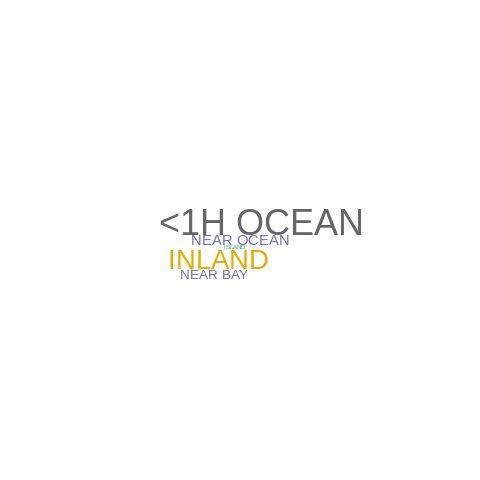

In [46]:
%%R
# Assuming 'ocean_proximity' is a column in your 'housing_data'
word_freq <- table(housing_data$ocean_proximity)

# Create word cloud
wordcloud(words = names(word_freq), freq = word_freq, min.freq = 1, scale=c(3,0.5), colors=brewer.pal(8, "Dark2"))

Provides a visual frequency of categorical data like city names or neighborhoods, showing which locations have more data entries.

# **Box and Whisker Plot**

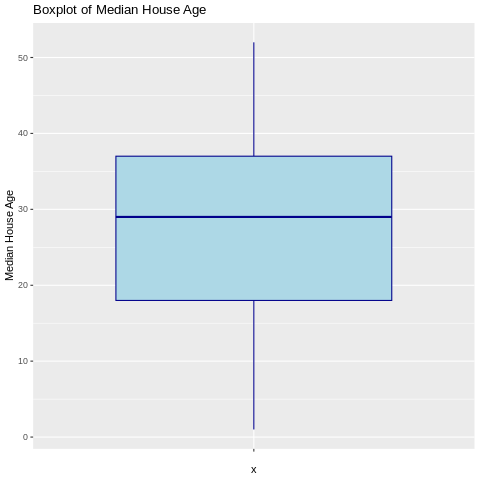

In [47]:
%%R
ggplot(housing_data, aes(x = "", y = housing_median_age)) +
  geom_boxplot(fill = "lightblue", color = "darkblue") +
  ylab("Median House Age") +
  ggtitle("Boxplot of Median House Age")

Can reveal the spread of house prices, detect outliers, and give insights into the central tendency of house values.

# **Violin Plot**

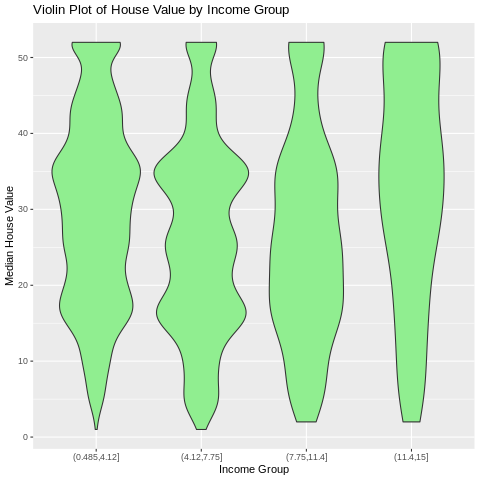

In [48]:
%%R
housing_data$median_income <- cut(housing_data$median_income, breaks = 4)

# Violin plot
ggplot(housing_data, aes(x = median_income, y = housing_median_age)) +
  geom_violin(fill = "lightgreen") +
  ylab("Median House Value") +
  xlab("Income Group") +
  ggtitle("Violin Plot of House Value by Income Group")

 Shows the distribution and density of house values across different income groups, highlighting income groups with higher variance in house prices.

# **Linear Regression Plot**

`geom_smooth()` using formula = 'y ~ x'


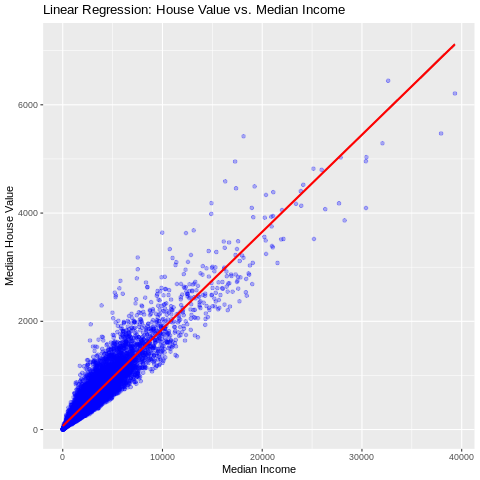

In [49]:
%%R
# Linear regression between Median Income and House Value
ggplot(housing_data, aes(x = total_rooms, y = total_bedrooms)) +
  geom_point(color = "blue", alpha = 0.3) +
  geom_smooth(method = "lm", color = "red") +
  ggtitle("Linear Regression: House Value vs. Median Income") +
  xlab("Median Income") +
  ylab("Median House Value")


A linear regression line provides insight into the direct relationship between median income and house prices, showing a positive trend where higher income leads to higher house prices.

# **Non-Linear Regression Plot**

`geom_smooth()` using formula = 'y ~ x'


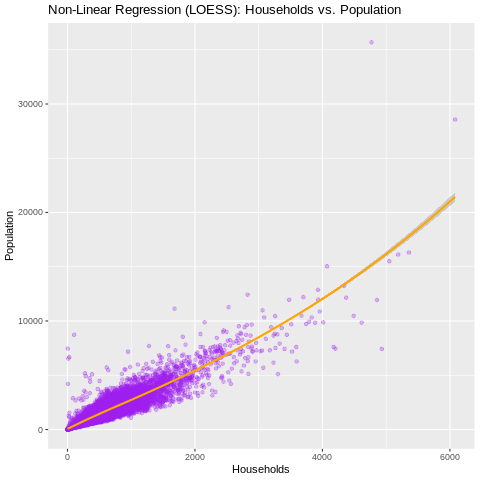

In [50]:
%%R
# Non-linear regression using LOESS
ggplot(housing_data, aes(x = households, y = population)) +
  geom_point(color = "purple", alpha = 0.3) +
  geom_smooth(method = "loess", color = "orange") +
  ggtitle("Non-Linear Regression (LOESS): Households vs. Population") +
  xlab("Households") +
  ylab("Population")


LOESS smoothing can uncover more nuanced relationships between income and house prices, showing local trends that a linear model might miss.

# **3D Scatter Plot**

In [51]:
%%R


# 3D scatter plot
plot_ly(housing_data, x = ~longitude, y = ~latitude, z = ~housing_median_age,
        type = 'scatter3d', mode = 'markers',
        marker = list(size = 3, color = ~housing_median_age, colorscale = 'Viridis'))


Explores how location (longitude and latitude) influences house values, helping visualize geographical pricing trends.

# **Jitter Plot**

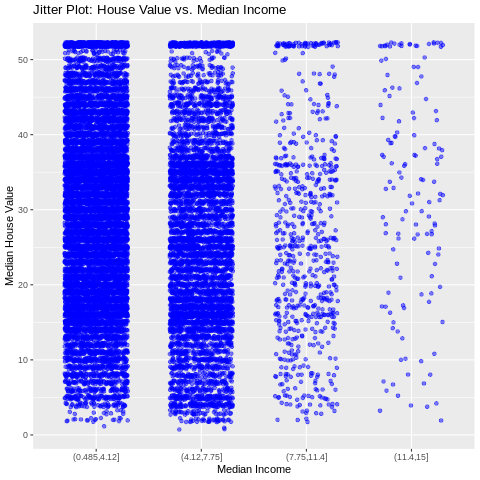

In [52]:
%%R
ggplot(housing_data, aes(x = median_income, y = housing_median_age)) +
  geom_jitter(color = "blue", alpha = 0.5, width = 0.3, height = 0.3) +
  ggtitle("Jitter Plot: House Value vs. Median Income") +
  xlab("Median Income") +
  ylab("Median House Value")


Overcomes overplotting by adding small random variations, helping better visualize relationships between median income and house value when there are overlapping data points.

